In [14]:
import keras
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from keras.models import Sequential 
from keras.layers import Dropout, Flatten, Dense, Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt 
%matplotlib inline
import os
import tensorflow as tf
import cv2
from tensorflow.keras.callbacks import EarlyStopping

In [15]:
import splitfolders

input_dir = "simpsons_dataset"
output_dir = "data"

#splitfolders.ratio(input_dir, output=output_dir, seed=1337, ratio=(.8, 0.1,0.1))

In [16]:
train_dir = "data/train"
val_dir = "data/val"
test_dir = "data/test"

image_size = (64, 64, 3)
# number of epochs to train top model 
epochs = 100 #this has been changed after multiple model run 
# batch size used by flow_from_directory and predict_generator 
batch_size = 100

labels = os.listdir(train_dir)

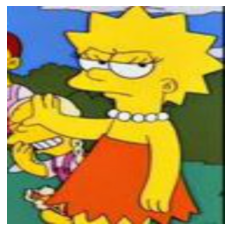

In [17]:
image_name = train_dir +"/lisa_simpson/pic_0001.jpg" #Image to be used as query
def plotLisa(image_location):
    image = cv2.imread(image_name)
    image = cv2.resize(image, (512,512))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.axis('off')
    return
plotLisa(image_name)

In [18]:
train_datagen = ImageDataGenerator( rescale = 1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2
                                    )

test_datagen = ImageDataGenerator(rescale=1./255)

In [19]:
training_set =  train_datagen.flow_from_directory(
                                                    train_dir,
                                                    target_size=image_size[:2],
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    color_mode='rgb'

)

val_set =  test_datagen.flow_from_directory(
                                                    val_dir,
                                                    target_size=image_size[:2],
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    color_mode='rgb'

)

Found 18860 images belonging to 43 classes.
Found 2073 images belonging to 43 classes.


In [20]:
for data_batch, labels_batch in training_set:
    print(data_batch.shape)
    break

(100, 64, 64, 3)


In [21]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=image_size, activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), padding='same', activation="relu")) 
model.add(Conv2D(256, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(len(labels), activation='softmax'))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 29, 29, 64)        36928     
                                                      

In [23]:
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

In [24]:
checkpoint_filepath = "checkpoints/{epoch:02d}-{val_accuracy:.2f}.hdf5"

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

callbacks = [
             EarlyStopping(patience=5, monitor="val_accuracy", mode="max"),
             model_checkpoint_callback,
]

In [25]:
history = model.fit_generator(  training_set,
                                epochs=epochs,
                                validation_data=val_set,
                                callbacks = callbacks
)

C:\Users\ninja\AppData\Local\Temp/ipykernel_14300/2817835706.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(  training_set,


Epoch 1/100
 48/189 [======>.......................] - ETA: 3:30 - loss: 3.2748 - accuracy: 0.0929

KeyboardInterrupt: 

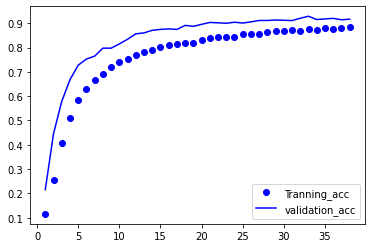

In [ ]:
import matplotlib.pyplot as plt

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Tranning_acc")
plt.plot(epochs, val_acc, "b", label="validation_acc")
plt.legend()

In [ ]:
import pickle
model.save('model/model.h5')

In [ ]:
saved_model = keras.models.load_model('model/model.h5')

In [ ]:
saved_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 29, 29, 64)        36928     
                                                      